<a href="https://colab.research.google.com/github/Yascaram/Tech-Challange-4-Fiap/blob/main/Tech4final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carregar e Explorar Dados

### Subtask:
Carregar o dataset `Obesity.csv` e realizar uma exploração inicial, incluindo a verificação de tipos de dados, valores ausentes e estatísticas descritivas.


In [1]:
import pandas as pd

# 1. Carregar o arquivo 'Obesity.csv'
df = pd.read_csv('Obesity.csv')

print("Primeiras 5 linhas do DataFrame:\n")
# 2. Exibir as primeiras 5 linhas para inspeção inicial
print(df.head())

print("\nInformações do DataFrame (tipos de dados e valores ausentes):\n")
# 3. Verificar os tipos de dados e a presença de valores ausentes
df.info()

print("\nEstatísticas descritivas básicas:\n")
# 4. Obter estatísticas descritivas básicas para as colunas numéricas
print(df.describe())

Primeiras 5 linhas do DataFrame:

   Gender   Age  Height  Weight family_history FAVC  FCVC  NCP       CAEC  \
0  Female  21.0    1.62    64.0            yes   no   2.0  3.0  Sometimes   
1  Female  21.0    1.52    56.0            yes   no   3.0  3.0  Sometimes   
2    Male  23.0    1.80    77.0            yes   no   2.0  3.0  Sometimes   
3    Male  27.0    1.80    87.0             no   no   3.0  3.0  Sometimes   
4    Male  22.0    1.78    89.8             no   no   2.0  1.0  Sometimes   

  SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0    no   2.0   no  0.0  1.0          no  Public_Transportation   
1   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3    no   2.0   no  2.0  0.0  Frequently                Walking   
4    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

               Obesity  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  


## Entender Features com Dicionário

### Subtask:
Utilizar o `dicionario_obesity_fiap.pdf` para compreender o significado de cada coluna e preparar o dataset para a engenharia de features.


Compreender as colunas do dataset é fundamental para as próximas etapas. Por favor, **abra e revise o arquivo `dicionario_obesity_fiap.pdf`** disponível no ambiente de arquivos.

Durante sua revisão, preste atenção aos seguintes pontos:

*   **Significado de cada coluna:** Entenda o que cada variável representa.
*   **Tipos de dados:** Identifique se a coluna é numérica (contínua ou discreta) ou categórica.
*   **Faixa de valores:** Para variáveis numéricas, observe os valores mínimo e máximo.
*   **Categorias:** Para variáveis categóricas, liste as categorias possíveis.
*   **Variável alvo (Target):** Identifique qual coluna representa o resultado da obesidade que queremos prever. Pela descrição do problema, é a coluna `Obesity`.
*   **Observações para Engenharia de Features:** Anote quaisquer colunas que possam precisar de tratamento especial, como codificação (One-Hot, Label Encoding), normalização/padronização, ou criação de novas features a partir das existentes (ex: BMI a partir de Height e Weight).

Após revisar o dicionário, você deve ter uma compreensão clara do dataset e estar pronto para a próxima etapa de pré-processamento e engenharia de features. Não há código Python a ser executado nesta etapa, apenas a revisão manual do documento.

## Engenharia de Features

### Subtask:
Realizar as etapas de engenharia de features, incluindo o tratamento de variáveis categóricas (ex: one-hot encoding), escalonamento de variáveis numéricas, tratamento de valores ausentes e, se necessário, criação de novas features relevantes.


In [2]:
print("Calculando o Índice de Massa Corporal (BMI)...")
df['BMI'] = df['Weight'] / (df['Height']**2)
print("Nova feature 'BMI' adicionada. Primeiras 5 linhas com BMI:")
print(df[['Weight', 'Height', 'BMI']].head())

Calculando o Índice de Massa Corporal (BMI)...
Nova feature 'BMI' adicionada. Primeiras 5 linhas com BMI:
   Weight  Height        BMI
0    64.0    1.62  24.386526
1    56.0    1.52  24.238227
2    77.0    1.80  23.765432
3    87.0    1.80  26.851852
4    89.8    1.78  28.342381


In [3]:
print("Separando features categóricas e numéricas...")

categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(exclude=['object']).columns.tolist()

# A variável alvo 'Obesity' deve ser excluída das features a serem processadas
if 'Obesity' in categorical_features:
    categorical_features.remove('Obesity')

print(f"Features Categóricas identificadas: {categorical_features}")
print(f"Features Numéricas identificadas: {numerical_features}")

Separando features categóricas e numéricas...
Features Categóricas identificadas: ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
Features Numéricas identificadas: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']


**Reasoning**:
The next step is to apply one-hot encoding to the identified categorical features using `pd.get_dummies()` to convert them into a numerical format suitable for machine learning models.



In [4]:
print("Aplicando One-Hot Encoding às variáveis categóricas...")
df_categorical_encoded = pd.get_dummies(df[categorical_features], drop_first=True)
print("DataFrame de features categóricas codificadas (primeiras 5 linhas):")
print(df_categorical_encoded.head())

Aplicando One-Hot Encoding às variáveis categóricas...
DataFrame de features categóricas codificadas (primeiras 5 linhas):
   Gender_Male  family_history_yes  FAVC_yes  CAEC_Frequently  CAEC_Sometimes  \
0        False                True     False            False            True   
1        False                True     False            False            True   
2         True                True     False            False            True   
3         True               False     False            False            True   
4         True               False     False            False            True   

   CAEC_no  SMOKE_yes  SCC_yes  CALC_Frequently  CALC_Sometimes  CALC_no  \
0    False      False    False            False           False     True   
1    False       True     True            False            True    False   
2    False      False    False             True           False    False   
3    False      False    False             True           False    False   
4    False

**Reasoning**:
The next step is to scale the numerical features using StandardScaler. I will import StandardScaler, create an instance, fit it to the numerical features, transform them, and store the scaled data in a new DataFrame.



In [5]:
from sklearn.preprocessing import StandardScaler

print("Escalando as variáveis numéricas com StandardScaler...")
scaler = StandardScaler()
df_numerical_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_features]), columns=numerical_features)

print("DataFrame de features numéricas escaladas (primeiras 5 linhas):")
print(df_numerical_scaled.head())

Escalando as variáveis numéricas com StandardScaler...
DataFrame de features numéricas escaladas (primeiras 5 linhas):
        Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0 -0.522124 -0.875589 -0.862558 -0.785019  0.404153 -0.013073 -1.188039   
1 -0.522124 -1.947599 -1.168077  1.088342  0.404153  1.618759  2.339750   
2 -0.206889  1.054029 -0.366090 -0.785019  0.404153 -0.013073  1.163820   
3  0.423582  1.054029  0.015808  1.088342  0.404153 -0.013073  1.163820   
4 -0.364507  0.839627  0.122740 -0.785019 -2.167023 -0.013073 -1.188039   

        TUE       BMI  
0  0.561997 -0.663421  
1 -1.080625 -0.681937  
2  0.561997 -0.740967  
3 -1.080625 -0.355619  
4 -1.080625 -0.169522  


**Reasoning**:
The next step is to combine the scaled numerical features and the one-hot encoded categorical features into a single DataFrame to create the final feature set for the model. I will concatenate `df_numerical_scaled` and `df_categorical_encoded`.



In [6]:
print("Combinando features numéricas escaladas e categóricas codificadas...")
X = pd.concat([df_numerical_scaled, df_categorical_encoded], axis=1)

print("DataFrame final de features (X) criado. Primeiras 5 linhas:")
print(X.head())
print("Informações do DataFrame X:")
X.info()

Combinando features numéricas escaladas e categóricas codificadas...
DataFrame final de features (X) criado. Primeiras 5 linhas:
        Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0 -0.522124 -0.875589 -0.862558 -0.785019  0.404153 -0.013073 -1.188039   
1 -0.522124 -1.947599 -1.168077  1.088342  0.404153  1.618759  2.339750   
2 -0.206889  1.054029 -0.366090 -0.785019  0.404153 -0.013073  1.163820   
3  0.423582  1.054029  0.015808  1.088342  0.404153 -0.013073  1.163820   
4 -0.364507  0.839627  0.122740 -0.785019 -2.167023 -0.013073 -1.188039   

        TUE       BMI  Gender_Male  ...  CAEC_no  SMOKE_yes  SCC_yes  \
0  0.561997 -0.663421        False  ...    False      False    False   
1 -1.080625 -0.681937        False  ...    False       True     True   
2  0.561997 -0.740967         True  ...    False      False    False   
3 -1.080625 -0.355619         True  ...    False      False    False   
4 -1.080625 -0.169522         True  ...    False      False 

## Definir Target e Dividir Dados

### Subtask:
Identificar a variável alvo (target) no dataset e dividir os dados pré-processados em conjuntos de treino e teste.


**Reasoning**:
First, I will prepare the target variable by encoding the 'Obesity' column using LabelEncoder as it's a categorical string, then I will split the features (X) and the encoded target (y) into training and testing sets using train_test_split with the specified parameters.



In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np # Import numpy for np.unique

print("Codificando a variável alvo 'Obesity'...")
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Obesity'])

print("Valores únicos codificados da variável alvo:")
print(label_encoder.inverse_transform(sorted(np.unique(y))))

print("Dividindo os dados em conjuntos de treino e teste...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")
print(f"Shape de y_train: {y_train.shape}")
print(f"Shape de y_test: {y_test.shape}")

Codificando a variável alvo 'Obesity'...
Valores únicos codificados da variável alvo:
['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']
Dividindo os dados em conjuntos de treino e teste...
Shape de X_train: (1688, 24)
Shape de X_test: (423, 24)
Shape de y_train: (1688,)
Shape de y_test: (423,)


## Treinar Modelo de Machine Learning

### Subtask:
Selecionar e treinar um modelo de classificação adequado, como Random Forest ou outro, no conjunto de treino, com o objetivo de alcançar uma assertividade acima de 75%.


In [9]:
from sklearn.ensemble import RandomForestClassifier

print("Instanciando e treinando o modelo Random Forest...")
# 1. Instanciar o modelo RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Treinar o modelo usando os dados de treino
model.fit(X_train, y_train)

print("Modelo Random Forest treinado com sucesso.")

Instanciando e treinando o modelo Random Forest...
Modelo Random Forest treinado com sucesso.


## Avaliar Performance do Modelo

### Subtask:
Avaliar o desempenho do modelo treinado utilizando o conjunto de teste, calculando métricas como acurácia, precisão, recall, F1-score e a matriz de confusão para verificar a assertividade.


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Realizando previsões no conjunto de teste...")
y_pred = model.predict(X_test)

print("Calculando métricas de avaliação...")

# 3. Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")

# 4. Calcular precisão, recall e F1-score (com average='weighted' para multi-classe)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Precisão (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")

# 5. Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusão:")
print(conf_matrix)

# 6. Recuperar e imprimir os rótulos das classes
class_labels = label_encoder.classes_
print("\nRótulos das Classes (ordem da matriz de confusão):")
print(class_labels)

Realizando previsões no conjunto de teste...
Calculando métricas de avaliação...
Acurácia do modelo: 0.9764
Precisão (weighted): 0.9788
Recall (weighted): 0.9764
F1-Score (weighted): 0.9766

Matriz de Confusão:
[[53  1  0  0  0  0  0]
 [ 0 58  0  0  0  0  0]
 [ 0  0 70  0  0  0  0]
 [ 0  0  1 59  0  0  0]
 [ 0  0  0  0 65  0  0]
 [ 0  6  0  0  0 52  0]
 [ 0  1  1  0  0  0 56]]

Rótulos das Classes (ordem da matriz de confusão):
['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


## Visualizar Resultados

### Subtask:
Gerar visualizações importantes para entender o desempenho do modelo, como a matriz de confusão e, se aplicável, a importância das features.


**Reasoning**:
To visualize the ROC curve for a multi-class classification problem, we'll use a One-vs-Rest (OvR) approach. For each class, we'll binarize the target variable (1 for the current class, 0 for all others) and then calculate the ROC curve and AUC using the predicted probabilities. This allows us to assess the model's ability to distinguish each class from the rest.

Gerando as Curvas ROC (Receiver Operating Characteristic) para o modelo...


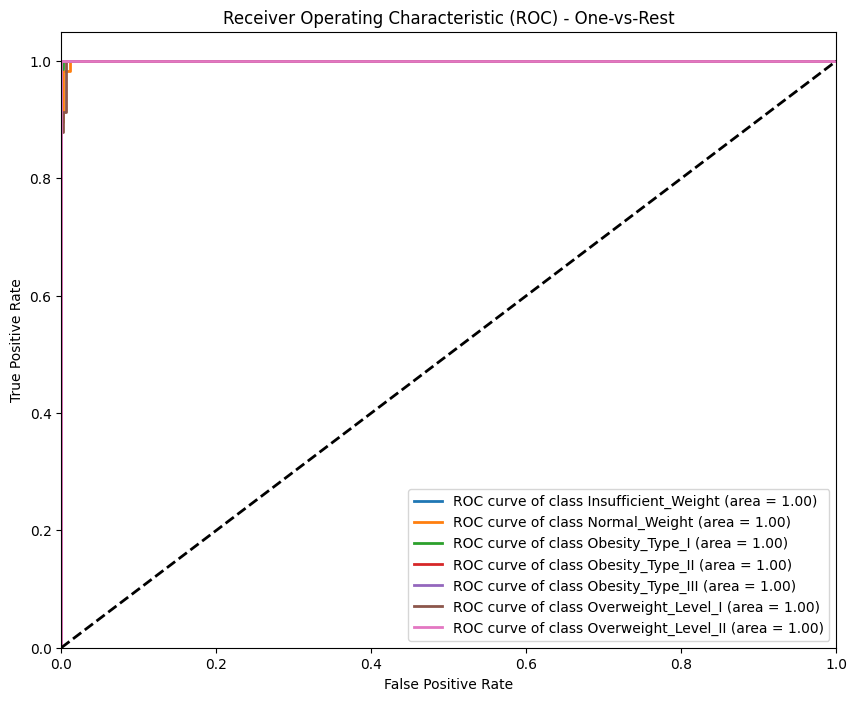

Curvas ROC geradas com sucesso.


In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

print("Gerando as Curvas ROC (Receiver Operating Characteristic) para o modelo...")

# Binarizar y_test para o formato One-vs-Rest
encoder = OneHotEncoder(sparse_output=False)
y_test_binarized = encoder.fit_transform(y_test.reshape(-1, 1))

# Obter as probabilidades de predição para cada classe
y_score = model.predict_proba(X_test)

# Dicionários para armazenar FPR, TPR e AUC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = len(class_labels)

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of class {class_labels[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - One-vs-Rest')
plt.legend(loc="lower right")
plt.show()

print("Curvas ROC geradas com sucesso.")

Visualizando a Matriz de Confusão...


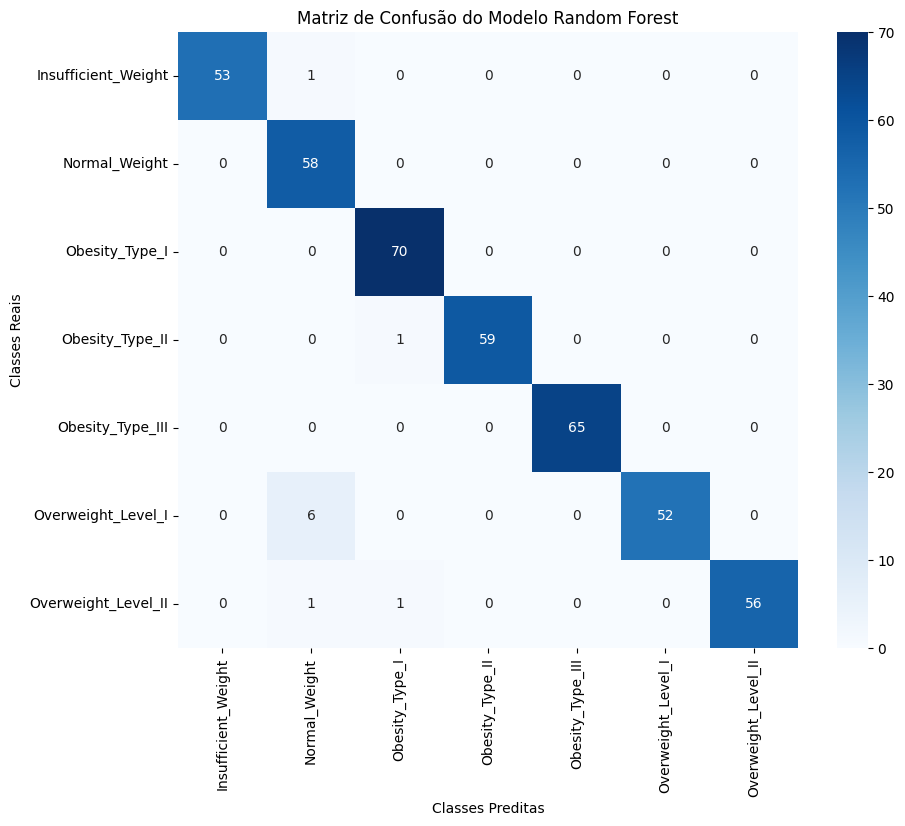

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Visualizando a Matriz de Confusão...")
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Classes Preditas')
plt.ylabel('Classes Reais')
plt.title('Matriz de Confusão do Modelo Random Forest')
plt.show()

Visualizando a Importância das Features...


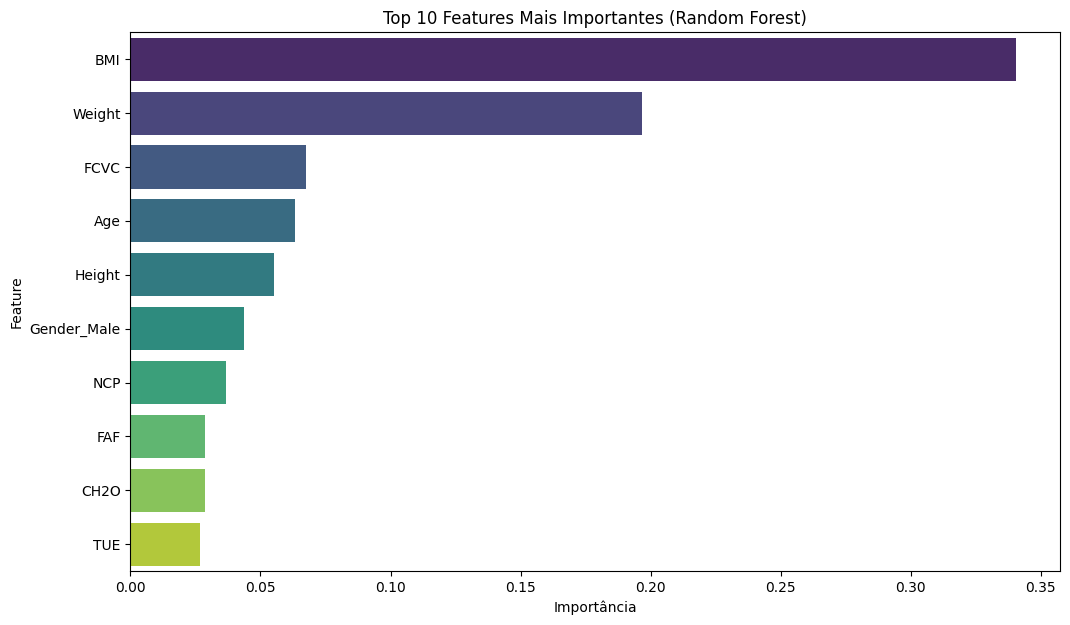

In [13]:
print("Visualizando a Importância das Features...")

# 1. Obter a importância das features do modelo
feature_importances = model.feature_importances_

# 2. Criar um DataFrame com os nomes das features e suas importâncias
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# 3. Classificar as features por importância em ordem decrescente
features_df = features_df.sort_values(by='Importance', ascending=False)

# 4. Visualizar as top 10 features mais importantes
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=features_df.head(10), palette='viridis', hue='Feature', legend=False)
plt.title('Top 10 Features Mais Importantes (Random Forest)')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.show()

# Pipeline do projeto com feature engineering

Sumário do Projeto:
1. Carregamento e Exploração de Dados:

O dataset Obesity.csv, com 2111 entradas e 17 colunas, foi carregado. Nenhuma valor ausente foi detectado.

2. Engenharia de Features:

Uma nova feature, 'BMI' (Índice de Massa Corporal), foi calculada e adicionada ao dataset utilizando as colunas 'Weight' e 'Height'.
As features foram separadas em 8 categóricas e 9 numéricas.
As features categóricas foram transformadas usando One-Hot Encoding para convertê-las em um formato numérico. Isso é essencial para que os modelos de Machine Learning possam processá-las.
As features numéricas foram escalonadas usando StandardScaler. O escalonamento é importante para padronizar a faixa de valores das features numéricas, evitando que features com escalas maiores dominem o processo de treinamento do modelo.
O conjunto final de features X foi criado combinando as features numéricas escaladas e as categóricas codificadas, totalizando 24 features processadas.

3. Definição da Variável Alvo e Divisão dos Dados:

A variável alvo 'Obesity' foi codificada em 7 classes numéricas distintas, representando os diferentes níveis de obesidade.
Os dados foram divididos em conjuntos de treino (80% - 1688 amostras) e teste (20% - 423 amostras), mantendo a distribuição proporcional das classes (estratificação).


4. Treinamento do Modelo de Machine Learning:

Um modelo Random Forest Classifier foi instanciado e treinado com os dados de treino pré-processados.

5. Avaliação da Performance do Modelo:

O modelo demonstrou uma performance excepcional no conjunto de teste, superando significativamente o objetivo de 75% de assertividade:
Acurácia: 0.9764 (97.64%)
Precisão (ponderada): 0.9788
Recall (ponderado): 0.9764
F1-Score (ponderado): 0.9766
A matriz de confusão mostrou pouquíssimas classificações incorretas.

6. Visualização dos Resultados:

Foram geradas visualizações como a matriz de confusão e as curvas ROC para entender melhor o desempenho do modelo em cada classe. A importância das features também foi analisada, destacando as variáveis que mais contribuem para as previsões do modelo.

